<a href="https://colab.research.google.com/github/sripriyaagarwal16/JupyterNbk_Models/blob/main/Copy_of_BirdsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
!mkdir my-dataset

In [ ]:
!mkdir -p ~/.kaggle
!cp "/content/kaggle.json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species


100% 1.95G/1.96G [00:16<00:00, 169MB/s]
100% 1.96G/1.96G [00:16<00:00, 126MB/s]


In [ ]:
!unzip -q 100-bird-species.zip -d my-dataset

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_directory='/content/my-dataset/train'
test_directory='/content/my-dataset/test'
val_directory='/content/my-dataset/valid'


In [ ]:

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
  # useful for getting number of classes
folders = glob('/content/my-dataset/train/*')
len(folders)

525

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode =  'categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [ ]:
print(len(training_set))
print(len(test_set))

2645
83


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-5932e3024fde>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
2645/2645 [==============================] - 1157s 437ms/step - loss: 6.4298 - accuracy: 0.3216 - val_loss: 3.6497 - val_accuracy: 0.5722
Epoch 2/10
2645/2645 [==============================] - 1143s 432ms/step - loss: 4.2127 - accuracy: 0.5497 - val_loss: 3.8015 - val_accuracy: 0.6133
Epoch 3/10
2645/2645 [==============================] - 1145s 433ms/step - loss: 3.5262 - accuracy: 0.6301 - val_loss: 3.4112 - val_accuracy: 0.6750
Epoch 4/10
2645/2645 [==============================] - 1154s 436ms/step - loss: 2.9606 - accuracy: 0.6899 - val_loss: 3.6305 - val_accuracy: 0.6842
Epoch 5/10
2645/2645 [==============================] - 1145s 433ms/step - loss: 2.6044 - accuracy: 0.7279 - val_loss: 3.6315 - val_accuracy: 0.6933
Epoch 6/10
2645/2645 [==============================] - 1130s 427ms/step - loss: 2.3354 - accuracy: 0.7559 - val_loss: 3.5924 - val_accuracy: 0.7017
Epoch 7/10
2645/2645 [==============================] - 1147s 433ms/step - loss: 2.0973 - accuracy: 0.7806

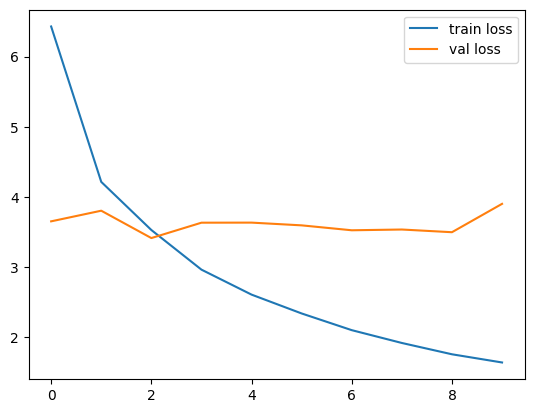

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


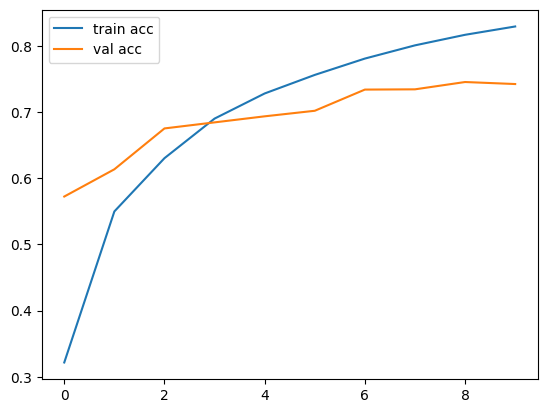

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('BC.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 0s 158ms/step


'AMERICAN AVOCET'

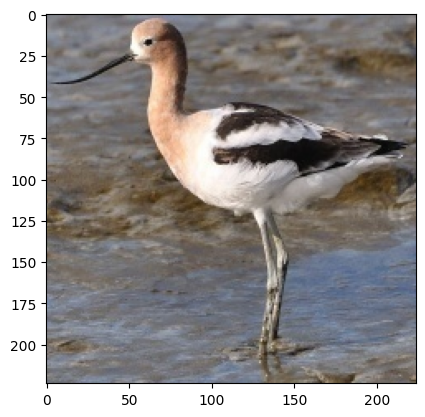

In [ ]:
img='/content/my-dataset/test/AMERICAN AVOCET/1.jpg'
pic=load_img('/content/my-dataset/test/AMERICAN AVOCET/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

1/1 [==============================] - 0s 39ms/step


'BEARDED REEDLING'

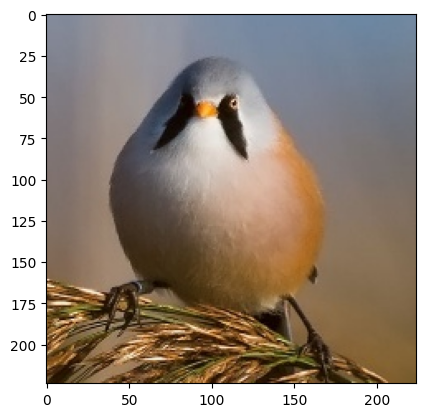

In [ ]:
img='/content/my-dataset/test/BEARDED REEDLING/3.jpg'
pic=load_img('/content/my-dataset/test/BEARDED REEDLING/3.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)